# Module 1 Code Challenge

This code challenge is designed to test your understanding of the Module 1 material. It covers:

- Pandas
- Data Visualization
- Exploring Statistical Data
- Python Data Structures

_Read the instructions carefully._ You will be asked both to write code and to respond to a few short answer questions.

### Note on the short answer questions

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

---
## Part 1: Pandas [Suggested Time: 15 minutes]
---

In this section you will be doing some preprocessing for a dataset for the videogame [FIFA19](https://www.kaggle.com/karangadiya/fifa19). The dataset contains both data for the game as well as information about the players' real life careers.

In [1]:
# Run this cell without changes

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 1.1) Read the CSV file into a pandas DataFrame

The data you'll be working with is in a file called `'./data/fifa.csv'`. Use your knowledge of pandas to create a new DataFrame, called `df`, using the data from this CSV file. 

Check the contents of the first few rows of your DataFrame, then show the size of the DataFrame. 

In [28]:
# Replace None with appropriate code
df = pd.read_csv('./data/fifa.csv')

In [29]:
# Code here to check the first few rows of the DataFrame
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


In [30]:
# Code here to see the size of the DataFrame
df.shape

(18207, 88)

### 1.2) Drop rows with missing values for `'Release Clause'`
    
Drop rows for which "Release Clause" is none or not given. This is part of a soccer player's contract dealing with being bought out by another team. After you have dropped them, see how many rows are remaining.

In [31]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [32]:
# Code here to drop rows with missing values for 'Release Clause'
#check the rows that have missing release cause
#look at how many rows and track
#drop those rows from the dataframe

df[df['Release Clause'].isna()] #1564 rows
df = df[df['Release Clause'].notna()] #keep all rows that have a value in Release Clause

In [33]:
# Code here to check how many rows are left 
df.shape # 18207 original - 1564 NaN = 16643. Checks out

(16643, 88)

### 1.3) Convert the `'Release Clause'` Price from Euros to Dollars

Now that there are no missing values, we can change the values in the `'Release Clause'` column from Euro to Dollar amounts.

Assume the current exchange rate is `1 Euro = 1.2 Dollars`

In [34]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


In [35]:
# Code here to convert the column of euros to dollars
#there should be more dollars than euros as output
#do a map apply lambda x * 1.2
#first value release clause messi is 226500 euros 
df['Release Clause'] = df['Release Clause'].apply(lambda x: x*1.2)

In [38]:
df['Release Clause']

,index,Release Clause
0,0,271800.0
1,1,152520.0
2,2,273720.0
3,3,166320.0
4,4,235680.0


In [40]:
df.head() # messi has 271800 now. 226500 * 1.2 = 271800 Checks out

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,271800.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,152520.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,273720.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,166320.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,235680.0


---
## Part 2: Data Visualization [Suggested Time: 20 minutes]
---

Continuing to use the same FIFA dataset, plot data using whichever plotting library you are most comfortable with.

In [41]:
# Run this cell without changes

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.1) Find the top 10 countries with the most players (using the `'Nationality'` column). Create a bar chart showing the number of players from those 10 countries.

Don't forget to add a **title** and **x axis label** to your charts.

If you are unable to find the top 10 countries but want the chance to demonstrate your plotting skills use the following dummy data to create a bar chart: 

```
Country Name  | Num Players
============  | ===========
Country A     | 100
Country B     | 60
Country C     | 125
Country D     | 89
```

In [47]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [90]:
# Code here to get the top 10 countries with the most players
# group players by country and show the top 10
# use count of ID as they are unique to determine how many players
df['Nationality'].value_counts().reset_index().head(10) #get counts of each nationality and show the top 10
most_players_df = df['Nationality'].value_counts().reset_index().head(10)  # set it equal to variable


,index,Nationality
0,England,1475
1,Germany,1151
2,Spain,974
3,France,853
4,Argentina,833
5,Brazil,788
6,Italy,579
7,Colombia,570
8,Japan,455
9,Netherlands,426


In [100]:
most_players_df['index']

0        England
1        Germany
2          Spain
3         France
4      Argentina
5         Brazil
6          Italy
7       Colombia
8          Japan
9    Netherlands
Name: index, dtype: object

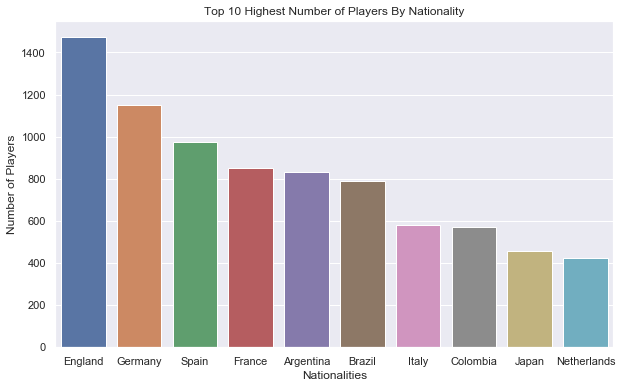

In [128]:
# Code here to plot a bar chart.  A recommended figsize is (10, 6)
figsize = (10,6) # create recommended fig size
fig, ax = plt.subplots(figsize=figsize) # create fig,ax for customization
sns.barplot(x = most_players_df['index'], y= most_players_df['Nationality']).set(
    title='Top 10 Highest Number of Players By Nationality',
    xlabel='Nationalities',
    ylabel='Number of Players'); # change labels

### 2.2) Describe the relationship between `StandingTackle` and `SlidingTackle`, as shown in the scatter plot produced below.

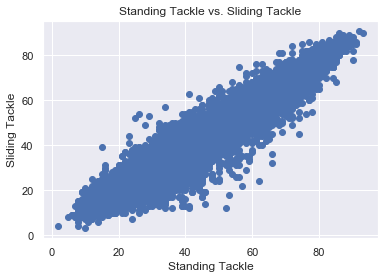

In [129]:
# Run this cell without changes

fig, ax = plt.subplots()

ax.set_title('Standing Tackle vs. Sliding Tackle')
ax.set_xlabel('Standing Tackle')
ax.set_ylabel('Sliding Tackle')

x = df['StandingTackle']
y = df['SlidingTackle']

ax.scatter(x, y)

Please describe in words the relationship between these two features.

### Your written answer here
It looks like there is a high positive correlation between standing and sliding tackle skill. In other words, if somebody is really good at one tackle type, it's highly probable he's also good at the other type.  Furthermore, if he's really bad at one type, then vice versa.

---
## Part 3: Exploring Statistical Data [Suggested Time: 20 minutes]
---

### 3.1) What are the mean age and the median age for the players in this dataset?

In [132]:
# Code here to find the mean age and median age
df['Age'].describe() # The mean age is 25.22 and the median age is 25

count    16643.000000
mean        25.226221
std          4.716588
min         16.000000
25%         21.000000
50%         25.000000
75%         29.000000
max         45.000000
Name: Age, dtype: float64

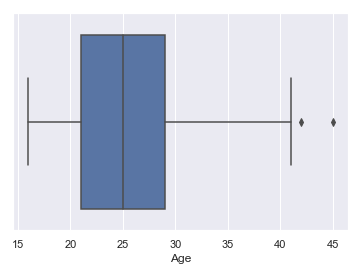

In [133]:
sns.boxplot(df['Age'])

In your own words, how are the mean and median related to each other and what do these values tell us about the distribution of the column `'Age'`? 

#### Your written answer here
The mean and median are very close to each other. The age of most players is between 20-30. Also, there are few outliers that skew the data in either direction.

### 3.2) Who is the oldest player from Argentina and how old is he?
Use the `Nationality` column.

In [166]:
# Code here to find the oldest player in Argentina
# group by
df.groupby(['Nationality', 'Age']).count().loc['Argentina'].sort_values(by='Age',ascending=False).head(5)

,ID,Name,Photo,Flag,Overall,Potential,Club,Club Logo,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Age,,,,,,,,,,,,,,,,,,,,,
41,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
40,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
39,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
38,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
37,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [169]:
#use conditional to find the age 41 player from argentina
df[(df['Age'] == 41) & (df['Nationality'] == 'Argentina')].Name # C. Muñoz, final answer

7225    C. Muñoz
Name: Name, dtype: object

---
## Part 4: Python Data Structures [Suggested Time: 20 min]
---

In this final section, we will work with various Python data types and try to accomplish certain tasks using some fundamental data structures in Python, rather than using Pandas DataFrames. Below, we've defined a dictionary with soccer player names as keys for nested dictionaries containing information about each player's age, nationality, and a list of teams they have played for.

In [232]:
# Run this cell without changes

players = {
    'L. Messi': {
        'age': 31,
        'nationality': 'Argentina',
        'teams': ['Barcelona']
    },
    'Cristiano Ronaldo': {
        'age': 33,
        'nationality': 'Portugal',
        'teams': ['Juventus', 'Real Madrid', 'Manchester United']
    },
    'Neymar Jr': {
        'age': 26,
        'nationality': 'Brazil',
        'teams': ['Santos', 'Barcelona', 'Paris Saint-German']
    },
    'De Gea': {
        'age': 27,
        'nationality': 'Spain',
        'teams': ['Atletico Madrid', 'Manchester United']
    },
    'K. De Bruyne': {
        'age': 27,
        'nationality': 'Belgium',
        'teams': ['Chelsea', 'Manchester City']
    }
}

### 4.1) Create a `list` of all the keys in the `players` dictionary. Store the list of player names in a variable called `player_names` to use in the next question.

Use [Python's documentation on dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) for help if needed. 

In [233]:
# Replace None with appropriate code to get the list of all player names
# I don't understand anymore going forward after this question. And the rest of these questions
# snowball after this one... Unsure what to reassign players variable to.
players = players.keys() # create list of player keys
player_names = [name for name in player_keys]

In [234]:
# Run this cell without changes to check your answer

print(player_names)

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne']


### 4.2) Great! Now that we have the names of all players, let's use that information to create a `list` of `tuples` containing each player's name along with their nationality. Store the list in a variable called `player_nationalities`.

In [239]:
# Replace None with appropriate code to generate list of tuples such that 
# the first element is a players name and the second is their nationality 
# Ex: [('L. Messi', 'Argentina'), ('Christiano Ronaldo', 'Portugal'), ...]

player_nationalities = [(name, nationality) for name,nationality in players['player_names']]

KeyError: 'player_names'

In [ ]:
# Run this cell without changes to check your answer

print(player_nationalities)

### 4.3) Define a function called `get_players_on_team()` that returns a `list` of the names of all the players who have played on a given team.

Your function should take two arguments: 

- a dictionary of player information
- the team name (as a `string`) you are trying to find the players for 

**Be sure that your function has a `return` statement.**

In [ ]:
# Code here to define your get_players_on_team() function 


In [ ]:
# Run this cell without changes to check your answer

players_on_manchester_united = get_players_on_team(players, 'Manchester United')
print(players_on_manchester_united)